In [49]:
import matplotlib.pyplot as plt
import numpy as np

from fuzzy_expert.variable import FuzzyVariable


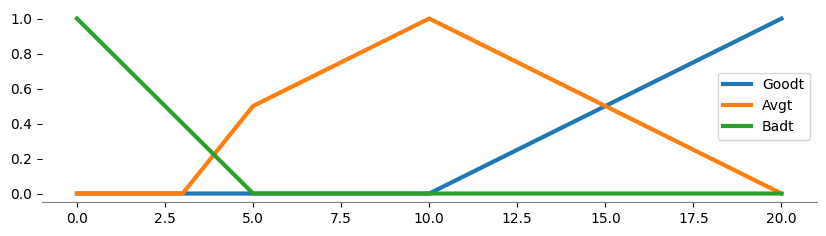

In [50]:
variables = {
    "fq": FuzzyVariable(
        universe_range=(0, 5),
        terms={
            "Goodfq": [(1,0), (2,0), (3,0),(4,0.5),(5,1)],
            "Avgfq": [(1,0), (2,0.5), (3,1),(4,0),(5,0)],
            "Badfq": [(1,1), (2,0.5), (3,0),(4,0),(5,0)],
            
        },
    ),
    
    "sq": FuzzyVariable(
        universe_range=(0, 5),
        terms={
            "Goodsq": [(1,0), (2,0), (3,0),(4,0.5),(5,1)],
            "Avgsq": [(1,0), (2,0.5), (3,1),(4,0),(5,0)],
            "Badsq": [(1,1), (2,0.5), (3,0),(4,0),(5,0)],
            
        },
    ),
    "tip": FuzzyVariable(
        universe_range=(0, 20),
        terms={
#             "Goodt": [(5,0), (10,0), (15,0.5),(20,1)],
#             "Avgt": [(5,0), (10,1), (15,0),(20,0)],
#             "Badt": [(5,1), (10,0), (15,0),(20,0)],
            "Goodt": [(5,0), (10,0), (15,0.5),(20,1)],
            "Avgt": [(3,0), (5,0.5), (10,1),(20,0)],
            "Badt": [(0,1), (5,0), (10,0),(15,0)],
            
        },
    )
    
}

plt.figure(figsize=(10, 2.5))
variables["tip"].plot()

In [70]:
from fuzzy_expert.rule import FuzzyRule

rules = [
    FuzzyRule(
        premise=[
            ("fq", "Goodfq"),
            ("AND", "sq", "Goodsq"),
        ],
        consequence=[("tip", "Goodt")],
    ),
    FuzzyRule(
        premise=[
            ("fq", "Badfq"),
            ("AND", "sq", "Badsq"),
        ],
        consequence=[("tip", "Badt")],
    ),
        FuzzyRule(
        premise=[
            ("fq", "Goodfq"),
            ("AND", "sq", "Goodsq"),
        ],
        consequence=[("tip", "Goodt")],
    ),
    FuzzyRule(
        premise=[
            ("fq", "Badfq"),
            ("OR", "sq", "Badsq"),
        ],
        consequence=[("tip", "Badt")],
    ),
        FuzzyRule(
        premise=[
            ("fq", "Avgfq"),
            ("OR", "sq", "Avgsq"),
        ],
        consequence=[("tip", "Avgt")],
    ),
    
         FuzzyRule(
        premise=[
            ("fq", "Goodfq"),
            ("AND", "sq", "Avgsq"),
        ],
        consequence=[("tip", "Avgt")],
    ),
        FuzzyRule(
        premise=[
            ("fq", "Avgfq"),
            ("AND", "sq", "Goodsq"),
        ],
        consequence=[("tip", "Avgt")],
    ),
    FuzzyRule(
        premise=[
            ("fq", "Badfq"),
            ("AND", "sq", "Avgsq"),
        ],
        consequence=[("tip", "Avgt")],
    ),
]

# print(rules)
# print()
# print(rules[1])


In [71]:
from fuzzy_expert.inference import DecompositionalInference

model = DecompositionalInference(
    and_operator="min",
    or_operator="max",
    implication_operator="Rc",
    composition_operator="max-min",
    production_link="max",
    defuzzification_operator="cog",
)

model(
    variables=variables,
    rules=rules,
    fq=2.5,
    sq=3,
)

({'tip': 9.833336626652825}, 1.0)

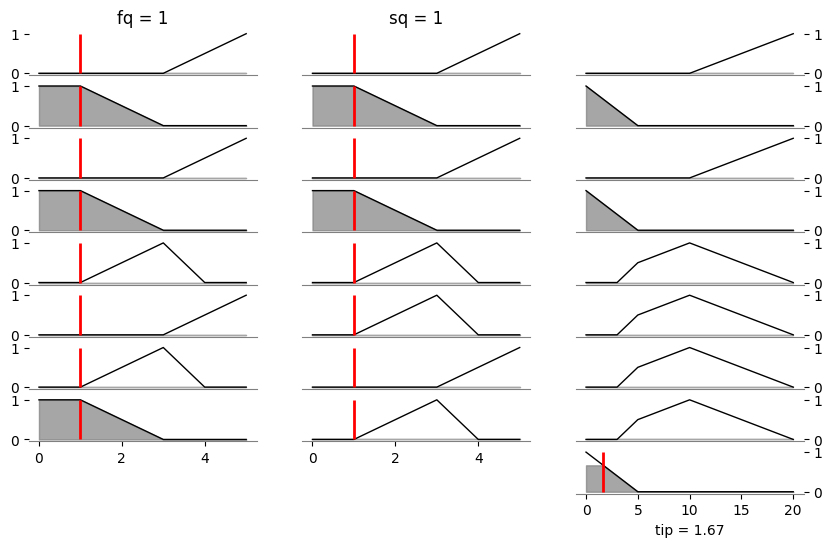

In [78]:
plt.figure(figsize=(10, 6))
model.plot(
    variables=variables,
    rules=rules,
    fq=1,
    sq=1,
)